In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [4]:
# Load the cleaned dataset
cleaned_df = pd.read_csv('../data/cleaned_mental_health_data_TS.csv')

print("Data successfully loaded into the DataFrame!")

Data successfully loaded into the DataFrame!


In [6]:
cleaned_df

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:00,female,united states,corporate,no,no,yes,7,yes,no,yes,medium,no,no,yes,no,not sure
1,2014-08-27 11:31:00,female,united states,corporate,no,yes,yes,7,yes,no,yes,medium,no,no,yes,no,no
2,2014-08-27 11:32:00,female,united states,corporate,no,yes,yes,7,yes,no,yes,medium,no,no,yes,no,yes
3,2014-08-27 11:37:00,female,united states,corporate,no,yes,yes,7,yes,no,yes,medium,no,no,yes,maybe,yes
4,2014-08-27 11:43:00,female,united states,corporate,no,yes,yes,7,yes,no,yes,medium,no,no,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290046,2015-07-27 23:25:00,male,united states,business,yes,yes,yes,22,no,maybe,no,low,yes,no,maybe,maybe,not sure
290047,2015-08-17 09:38:00,male,south africa,business,no,yes,yes,22,no,maybe,no,low,yes,no,maybe,no,yes
290048,2015-08-25 19:59:00,male,united states,business,no,yes,no,22,no,maybe,no,low,yes,no,maybe,no,no
290049,2015-09-26 01:07:00,male,united states,business,no,yes,yes,22,no,maybe,no,low,yes,no,maybe,no,yes


In [8]:
# Check for missing or undefined values in the Gender column
print(cleaned_df['Gender'].unique())

['female' 'male']


Bokeh is a powerful Python library for creating interactive visualizations that can be easily embedded into web applications. It is particularly well-suited for generating interactive plots, dashboards, and data applications. Bokeh's main strengths include its interactivity, flexibility, and its ability to handle large datasets in the browser. It creates visualizations that are immediately ready for web display without the need for additional coding.

# Key Features of Bokeh:
1- Interactivity: Bokeh allows users to create interactive plots with tooltips, hover effects, zooming, and more.
2- Web Integration: It can generate plots as standalone HTML files, which can be embedded into websites.
3- Python-Friendly: Bokeh has a simple syntax that makes it easy to use for Python developers, while still providing powerful customization options.

# How Bokeh Works:
Data Source: Bokeh uses a concept called ColumnDataSource to manage and transfer data between Python and the visualization.
Plotting Functions: It provides various functions like vbar, hbar, line, scatter, etc., to create different types of plots.
Rendering: Bokeh renders visualizations using HTML and JavaScript, which means that the charts are interactive and can be displayed directly in web browsers.
Save Options: You can save plots as HTML files, or with additional setup, save them as PNG files using Selenium.


In [10]:
# gender distribution
from bokeh.plotting import figure, show, output_notebook, save, output_file
from bokeh.io import push_notebook
from bokeh.models import ColumnDataSource
from bokeh.io.export import export_png

# Prepare data for Bokeh
gender_counts = cleaned_df['Gender'].value_counts()
categories = list(gender_counts.index)
counts = list(gender_counts.values)

# Create a data source with custom colors for each gender
source = ColumnDataSource(data=dict(categories=categories, counts=counts, color=['#1f77b4', '#ff7f0e']))  # Blue for female, Orange for male

# Create a new plot with a title and axis labels
p = figure(x_range=categories, height=350, width=600, title="Distribution of Gender",
           toolbar_location=None, tools="")

# Add a bar renderer with custom colors for each gender
p.vbar(x='categories', top='counts', width=0.5, color='color', source=source)

# Customize the appearance of the chart
p.xgrid.grid_line_color = None
p.y_range.start = 0

# Show the interactive chart in Jupyter Notebook
output_notebook()
show(p, notebook_handle=True)

# Save the plot to an HTML file
output_file('../notebooks/images/gender_distribution.html')
save(p)

# Save the plot as a PNG file
export_png(p, filename="../notebooks/images/gender_distribution.png")


Loading BokehJS ...

'/Users/yara/Desktop/UMN/Mental_Health/notebooks/images/gender_distribution.png'

# Based on the chart:

1- The male category has a significantly higher count compared to the female category.
2- This might indicate a gender imbalance in the data collection process or in the population represented by the dataset.
3- Such information can be valuable in identifying trends, biases, or inequalities in the context in which this data was collected.

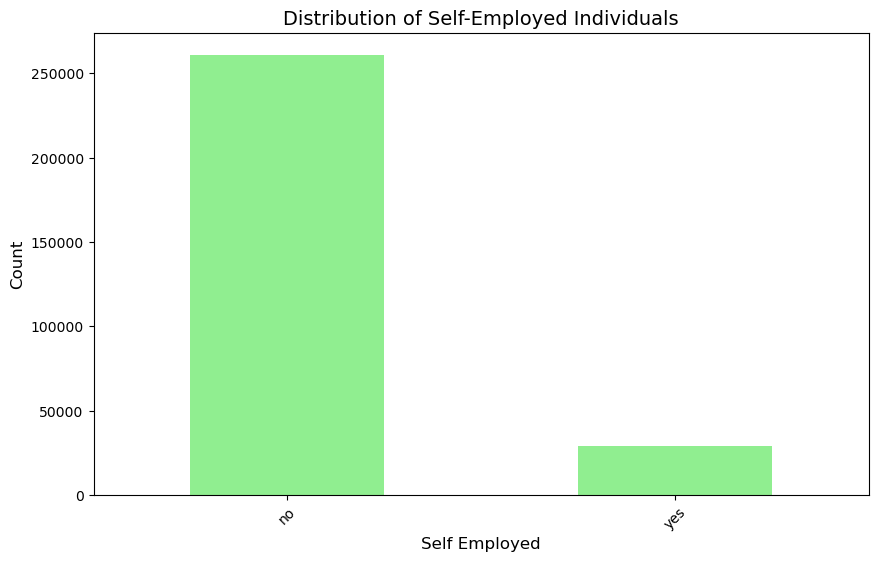

In [12]:
# Plot distribution of 'self_employed'
plt.figure(figsize=(10, 6))
cleaned_df['self_employed'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Self-Employed Individuals', fontsize=14)
plt.xlabel('Self Employed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.savefig('../notebooks/images/distribution_of_self_employed.png') 
plt.show()

# Distribution of Self-Employed Individuals
1- Description: This chart represents the count of self-employed individuals compared to those who are not self-employed.
2- Observations:
There is a much higher number of individuals who are not self-employed compared to those who are self-employed.
The number of non-self-employed individuals is approximately five times greater than that of self-employed individuals.
# Implications:
1- This disparity suggests that the majority of individuals in the dataset work in structured or traditional employment settings rather than in self-employment.
2- It may be worthwhile to explore if self-employed individuals face different challenges or mental health issues compared to non-self-employed individuals.


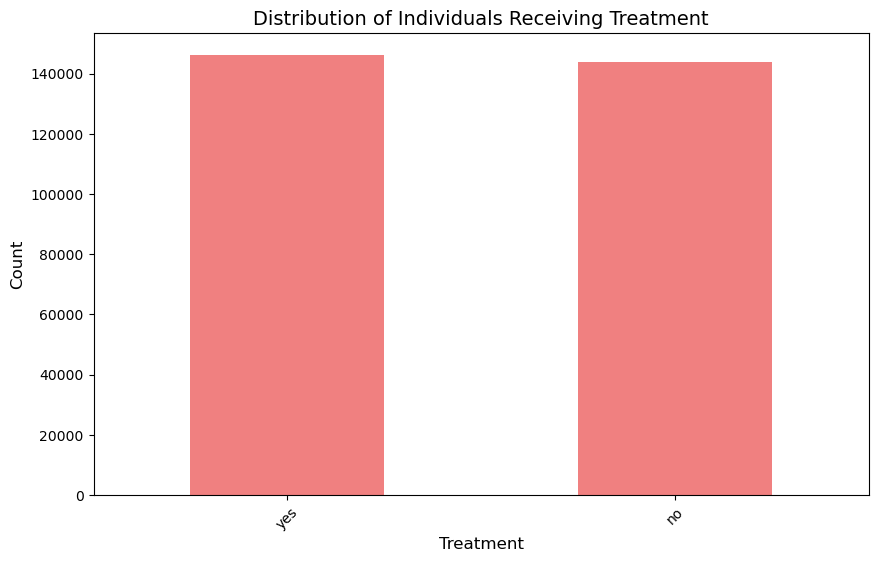

In [14]:
# Plot distribution of 'treatment'
plt.figure(figsize=(10, 6))
cleaned_df['treatment'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Individuals Receiving Treatment', fontsize=14)
plt.xlabel('Treatment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('../notebooks/images/distribution_of_treatment.png')
plt.xticks(rotation=45)
plt.show()

# Distribution of Individuals Receiving Treatment
1- Description: This bar chart visualizes the distribution of individuals based on whether they are receiving treatment or not.
2- Observations:
There is a relatively balanced distribution between individuals who are receiving treatment and those who are not.
The number of individuals receiving treatment is slightly higher than those who are not, indicating a good level of treatment accessibility or awareness.

# Implications:
1- This chart suggests that a significant portion of the population is receiving treatment, which could indicate good mental health support systems in place.
2- However, since the numbers are almost equal, there might still be a considerable portion of the population that is not seeking or unable to access treatment.


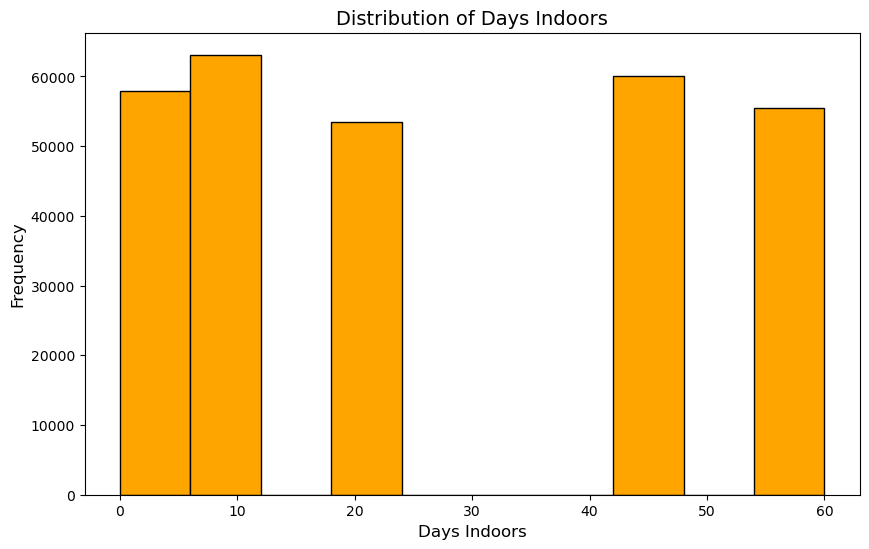

In [16]:
# Plot histogram of 'Days_Indoors'
plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['Days_Indoors'], bins=10, color='orange', edgecolor='black')
plt.title('Distribution of Days Indoors', fontsize=14)
plt.xlabel('Days Indoors', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('../notebooks/images/distribution_of_days_indoors.png')
plt.show()

# Distribution of Days Indoors
1- Description: This bar chart illustrates the frequency of different time intervals (in days) that individuals spend indoors.
2- Observations:
The chart shows peaks at intervals of 0, 10, 40, and 50 days, suggesting certain common lengths of time people spend indoors.
The number of people decreases for days like 20 and 60, indicating that fewer individuals fall into those categories.
# Implications:
1- These patterns could indicate work or lifestyle habits that lead individuals to stay indoors for particular intervals.
2- Further investigation could help identify if specific circumstances or external factors (e.g., lockdowns, remote work) influence these time intervals.

In [18]:
# Group by country to get a summary of mental health treatment status
country_analysis = cleaned_df.groupby('Country')['treatment'].value_counts(normalize=True).unstack().fillna(0) * 100

# Save the country-based analysis DataFrame to a CSV file
country_analysis.to_csv('../data/country_based_analysis.csv', index=True)

# Display the analysis
country_analysis.head(10)

treatment,no,yes
Country,,
australia,39.590954,60.409046
belgium,100.000000,0.000000
bosnia and herzegovina,100.000000,0.000000
brazil,66.666667,33.333333
canada,46.104070,53.895930
colombia,100.000000,0.000000
costa rica,100.000000,0.000000
croatia,0.000000,100.000000
czech republic,100.000000,0.000000


Analysis of Mental Health Trends by Country

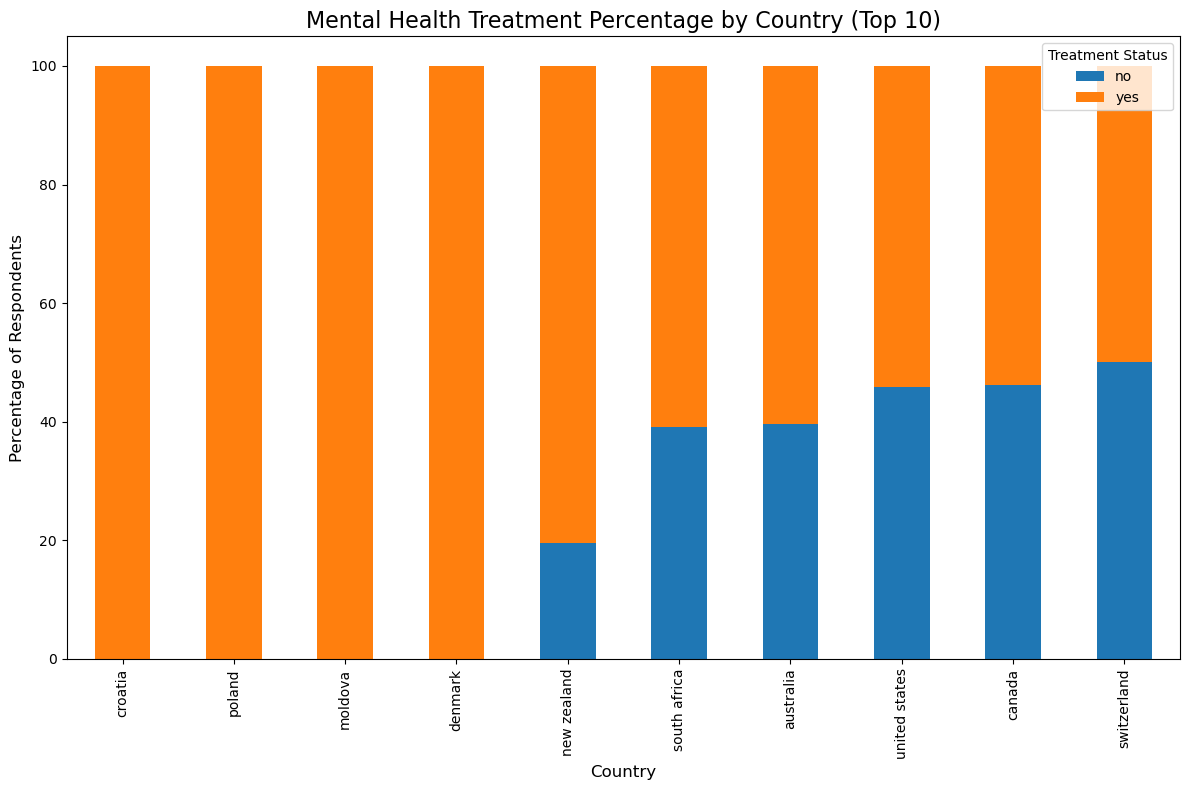

In [20]:
# Plot the top 10 countries with the highest percentage of treatment-seeking respondents
top_countries = country_analysis.sort_values(by='yes', ascending=False).head(10)

# Create the bar plot
top_countries.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Mental Health Treatment Percentage by Country (Top 10)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of Respondents', fontsize=12)
plt.legend(title='Treatment Status', loc='upper right')
plt.tight_layout()
# Save the plot to the 'images' folder
plt.savefig('../notebooks/images/treatment_by_country.png')
plt.show()

# Analysis
The bar chart above shows the percentage of respondents from the top 10 countries who reported receiving mental health treatment. Here are some key observations from the visualization:

1- High Treatment Rates: Several countries, including Croatia, Poland, Moldova, and Denmark, have a 100% treatment rate among the respondents. This may indicate strong cultural acceptance or accessibility to mental health services in these countries.
2-  Moderate Treatment Rates: Countries like New Zealand, South Africa, Australia, the United States, Canada, and Switzerland show a more balanced distribution between respondents who received treatment and those who did not. This could suggest variability in mental health awareness, societal stigma, or availability of services.
3- Significant Non-Treatment Rates: The countries with significant percentages of respondents who did not receive treatment include New Zealand and South Africa. This may reflect barriers to accessing mental health services or differing perceptions of mental health in these regions.
# Considerations:
1- Cultural Factors: The differences in treatment rates could be influenced by cultural attitudes towards mental health, availability of resources, and the quality of mental health care infrastructure.
2- Data Representation: Since the percentages are derived from the respondent data, they may not necessarily reflect the national averages for these countries, especially if the sample size from each country varies significantly.
3- Further Exploration: It would be useful to further explore correlations between treatment rates and other variables such as gender, self-employment status, and family history of mental health issues to gain a deeper understanding.

Gender-Based Analysis of Mental Health Treatment by Country

In [22]:
# Group by country and gender to analyze treatment status
gender_country_analysis = cleaned_df.groupby(['Country', 'Gender'])['treatment'].value_counts(normalize=True).unstack().fillna(0) * 100

# Save the gender-based analysis DataFrame to a CSV file
gender_country_analysis.to_csv('../data/gender_based_analysis.csv', index=True)

# Display the first few rows to confirm the structure
gender_country_analysis.head

<bound method NDFrame.head of treatment                              no         yes
Country                Gender                        
australia              female   25.000000   75.000000
                       male     45.454545   54.545455
belgium                female  100.000000    0.000000
                       male    100.000000    0.000000
bosnia and herzegovina male    100.000000    0.000000
brazil                 male     66.666667   33.333333
canada                 female   11.111111   88.888889
                       male     55.263158   44.736842
colombia               male    100.000000    0.000000
costa rica             male    100.000000    0.000000
croatia                male      0.000000  100.000000
czech republic         male    100.000000    0.000000
denmark                male      0.000000  100.000000
finland                male    100.000000    0.000000
france                 male    100.000000    0.000000
georgia                male    100.000000    0.00000

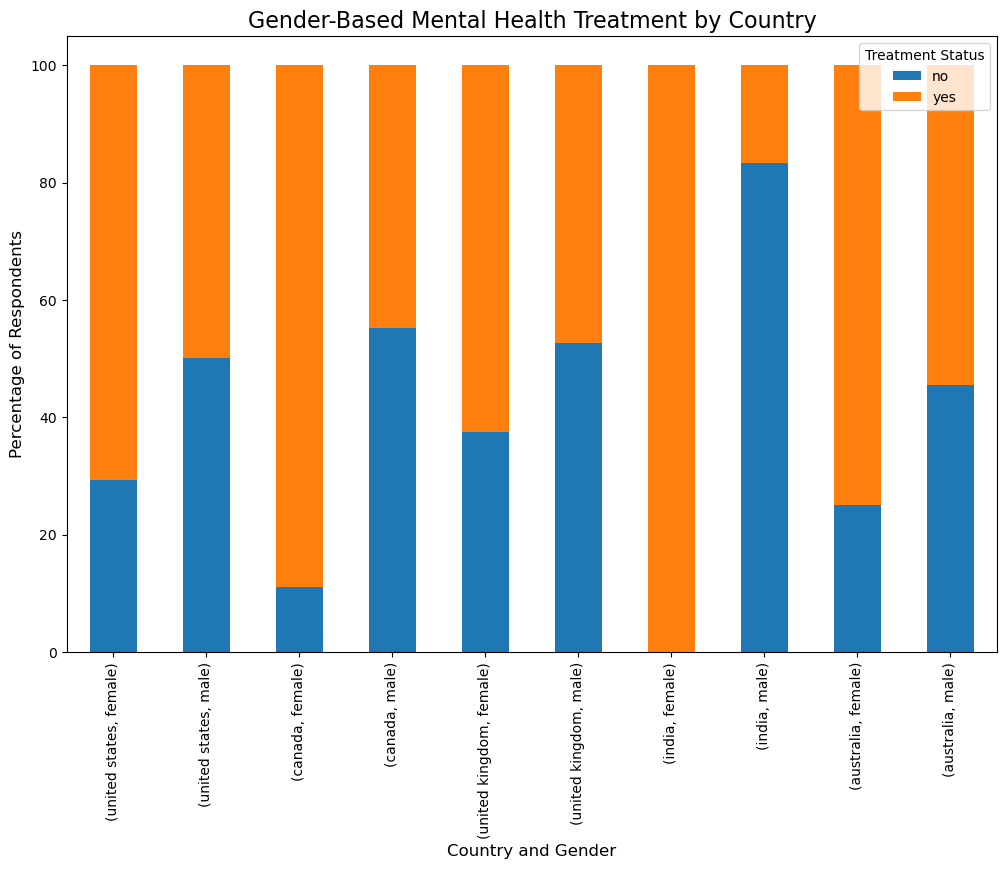

In [24]:
# Select the top 5 countries with the most respondents for visualization
top_countries_gender = gender_country_analysis.loc[['united states', 'canada', 'united kingdom', 'india', 'australia']]

# Create a bar plot for gender-based analysis of treatment status
top_countries_gender.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#1f77b4', '#ff7f0e'])
plt.title('Gender-Based Mental Health Treatment by Country', fontsize=16)
plt.xlabel('Country and Gender', fontsize=12)
plt.ylabel('Percentage of Respondents', fontsize=12)
plt.legend(title='Treatment Status', loc='upper right')
plt.tight_layout
# Save the plot to the 'images' folder
plt.savefig('../notebooks/images/gender_based_treatment_by_country.png')
plt.show()

# Analysis of Gender-Based Mental Health Treatment by Country
The bar chart above illustrates the gender-based differences in mental health treatment across the selected countries. Key observations from the visualization include:

. Higher Treatment Rates for Females: In all the countries displayed, females have a consistently higher rate of seeking mental health treatment compared to males. This could suggest that females might be more open to discussing mental health issues and seeking help when needed.
. Significant Gender Gap: Countries like the United States, Canada, and the United Kingdom show a notable difference in treatment rates between males and females, with a higher percentage of females seeking treatment.
. Cultural or Societal Factors: The disparity in treatment rates could be influenced by societal norms, cultural attitudes towards mental health, or perceived stigma that affects males more than females.
. Countries with Balanced Treatment Rates: Some countries, such as India, show a smaller gap between males and females in terms of treatment-seeking behavior, indicating more balanced attitudes towards mental health treatment.
# Considerations:
. Awareness and Support: It may be important to focus on raising awareness and reducing stigma for mental health issues, especially among males, in countries where there is a significant gap.
. Further Analysis: To understand the underlying causes of these gender differences, it might be useful to analyze other factors such as age, occupation, and socioeconomic status in conjunction with gender and treatment rates.

# Combined Analysis of Gender and Self-Employment Status

In [26]:
# Group by gender, self-employment status, and treatment status
combined_analysis = cleaned_df.groupby(['Gender', 'self_employed'])['treatment'].value_counts(normalize=True).unstack().fillna(0) * 100

# Save the combined gender and self-employment analysis DataFrame to a CSV file
combined_analysis.to_csv('../data/gender_self_employment_analysis.csv', index=True)

# Display the first few rows to verify the grouped data
combined_analysis.head()


treatment                    no         yes
Gender self_employed                       
female no             32.456140   67.543860
       yes             0.000000  100.000000
male   no             54.327808   45.672192
       yes            49.253731   50.746269

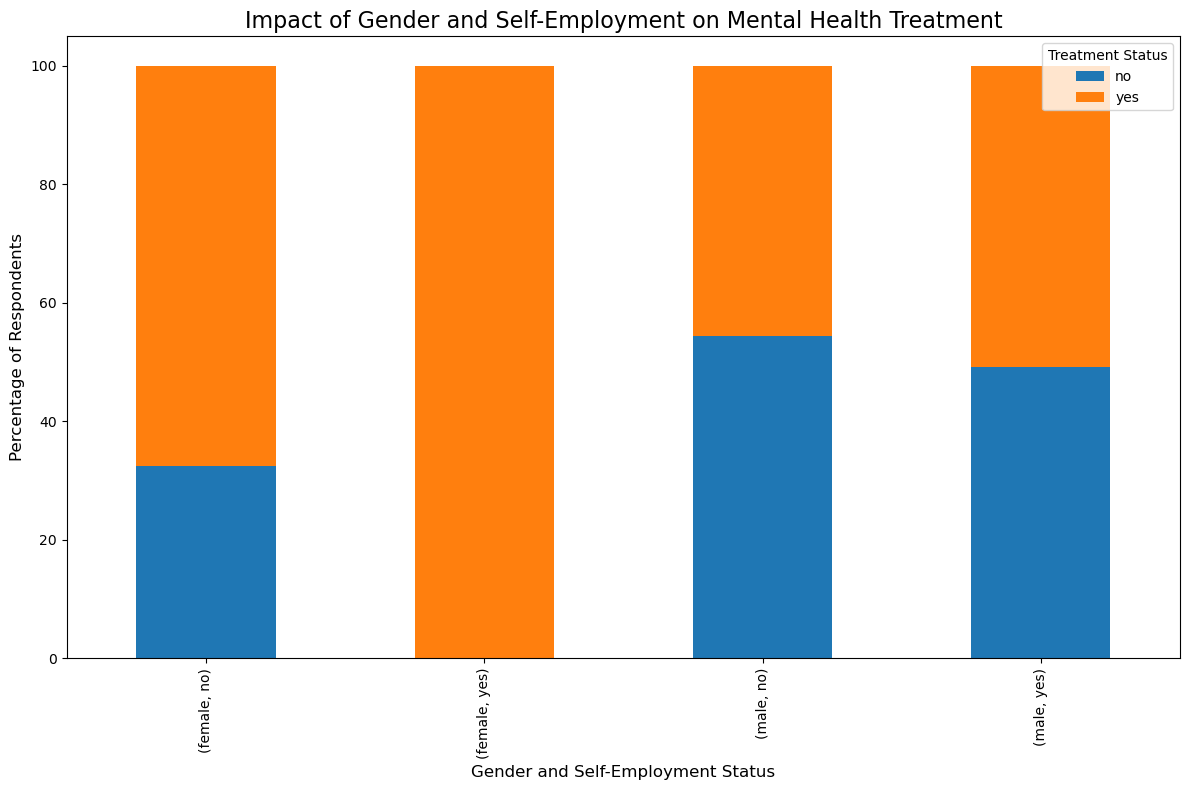

In [28]:
# Create a bar plot for the combined analysis of gender and self-employment status
combined_analysis.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#1f77b4', '#ff7f0e'])
plt.title('Impact of Gender and Self-Employment on Mental Health Treatment', fontsize=16)
plt.xlabel('Gender and Self-Employment Status', fontsize=12)
plt.ylabel('Percentage of Respondents', fontsize=12)
plt.legend(title='Treatment Status', loc='upper right')
plt.tight_layout()
# Save the plot to the 'images' folder
plt.savefig('../notebooks/images/gender_self_employment_treatment.png')
plt.show()

# Analysis of Gender and Self-Employment on Mental Health Treatment
The bar chart above highlights how gender and self-employment status together influence the likelihood of seeking mental health treatment. Key observations from the visualization include:

. Higher Treatment Rates Among Females: Regardless of self-employment status, females consistently show a higher percentage of seeking mental health treatment compared to their male counterparts. This trend suggests that females are generally more proactive in addressing mental health concerns.
Impact of Self-Employment: The difference in treatment rates between self-employed and non-self-employed individuals appears to be less significant for females than for males. This could indicate that self-employment status has a stronger impact on men's decision to seek treatment.
. Male Treatment Rates: Males, both self-employed and non-self-employed, exhibit a lower percentage of treatment-seeking behavior compared to females. This finding may suggest societal or cultural factors that discourage men from seeking mental health support.
. Slightly Higher Treatment Rates for Non-Self-Employed Males: Non-self-employed males show a marginally higher rate of seeking treatment compared to their self-employed counterparts, indicating that job security or workplace support might play a role in treatment accessibility.
# Considerations:
Targeted Interventions: The findings highlight the need for targeted mental health interventions, especially for self-employed individuals and men, to encourage proactive mental health support.
Exploring Other Factors: To gain a deeper understanding, further analysis could involve exploring other variables like age, occupation type, and work environment to see how they influence treatment-seeking behavior.

# Direct Encoding of Categorical Variables
We'll manually encode the categorical variables using Pandas, which allows us to convert categorical data into numerical form in a straightforward way. 
This method will map each unique category in a column to a numerical code, which is suitable for the correlation analysis.

# Explanation of Direct Encoding
How it works: Each unique category in a column is assigned a unique integer code. For example, if the Gender column contains male, female, and other, they might be encoded as 0, 1, and 2.
Why it's necessary: Many machine learning algorithms and statistical methods require numerical inputs. Encoding allows us to include these categorical features in calculations like the correlation matrix.

In [30]:
# List of categorical columns to encode
categorical_columns = [
    'Gender', 'Country', 'Occupation', 'self_employed', 'family_history',
    'treatment', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History',
    'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
    'mental_health_interview', 'care_options'
]

# Convert each categorical column to numeric codes
for col in categorical_columns:
   cleaned_df[col] = cleaned_df[col].astype('category').cat.codes

# Display the first few rows to verify the encoding
cleaned_df.head()


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:00,0,34,1,0,0,1,7,2,1,2,2,0,1,2,1,1
1,2014-08-27 11:31:00,0,34,1,0,1,1,7,2,1,2,2,0,1,2,1,0
2,2014-08-27 11:32:00,0,34,1,0,1,1,7,2,1,2,2,0,1,2,1,2
3,2014-08-27 11:37:00,0,34,1,0,1,1,7,2,1,2,2,0,1,2,0,2
4,2014-08-27 11:43:00,0,34,1,0,1,1,7,2,1,2,2,0,1,2,1,2


In [32]:
cleaned_df = cleaned_df.drop(columns=['Timestamp'])
cleaned_df

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,0,34,1,0,0,1,7,2,1,2,2,0,1,2,1,1
1,0,34,1,0,1,1,7,2,1,2,2,0,1,2,1,0
2,0,34,1,0,1,1,7,2,1,2,2,0,1,2,1,2
3,0,34,1,0,1,1,7,2,1,2,2,0,1,2,0,2
4,0,34,1,0,1,1,7,2,1,2,2,0,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290046,1,34,0,1,1,1,22,1,0,1,1,1,1,0,0,1
290047,1,29,0,0,1,1,22,1,0,1,1,1,1,0,1,2
290048,1,34,0,0,1,0,22,1,0,1,1,1,1,0,1,0
290049,1,34,0,0,1,1,22,1,0,1,1,1,1,0,1,2


# Understanding the Correlation Matrix
A correlation matrix is a table showing the correlation coefficients between multiple variables. Each cell in the matrix represents the correlation between two variables. The value ranges between -1 and 1, where:

+1 indicates a perfect positive correlation: As one variable increases, the other also increases proportionally.
-1 indicates a perfect negative correlation: As one variable increases, the other decreases in a perfectly proportional manner.
0 indicates no correlation: There is no linear relationship between the two variables.

# How to Read the Correlation Matrix
Diagonal Values: The diagonal cells of the matrix all have a value of 1 because each variable is perfectly correlated with itself.

# Color Coding:

. Red/Orange Shades: Represent positive correlations, meaning that as one variable increases, the other tends to increase as well.
. Blue Shades: Represent negative correlations, meaning that as one variable increases, the other tends to decrease.
. The color intensity indicates the strength of the correlation — the closer the color is to the extremes (dark red or dark blue), the    stronger the correlation.
. Symmetry: The matrix is symmetric, which means the correlation between variables X and Y is the same as the correlation between Y and X.

# Interpreting the Matrix for Insights
. High Positive Correlation: If two variables have a correlation close to +1 (e.g., family_history and treatment), it suggests that individuals with a family history of mental health issues are more likely to seek treatment.
. High Negative Correlation: Variables with a correlation close to -1 indicate a strong inverse relationship. For example, a negative correlation between self_employed and mood_swings could imply that self-employed individuals might experience fewer mood swings.
. Low or Zero Correlation: Variables with correlations close to 0 have no significant linear relationship, indicating that changes in one variable do not predict changes in the other.

# How to Use the Matrix in Analysis
. Identify Relationships: Use the matrix to quickly identify which variables are strongly related to each other.
. Target Variables: Focus on variables with high correlations to target key areas of interest or patterns that can be useful for making data-driven decisions.

# Importance of Correlation Analysis:
Understanding the correlation between variables helps identify potential predictors of mental health conditions or behaviors. For example, knowing that family history has a strong impact on treatment can guide targeted support initiatives for individuals with a family history of mental health issues.

It's important to note that correlation does not imply causation; a relationship between two variables does not mean that one causes the other. Further analysis may be needed to explore these relationships in depth.


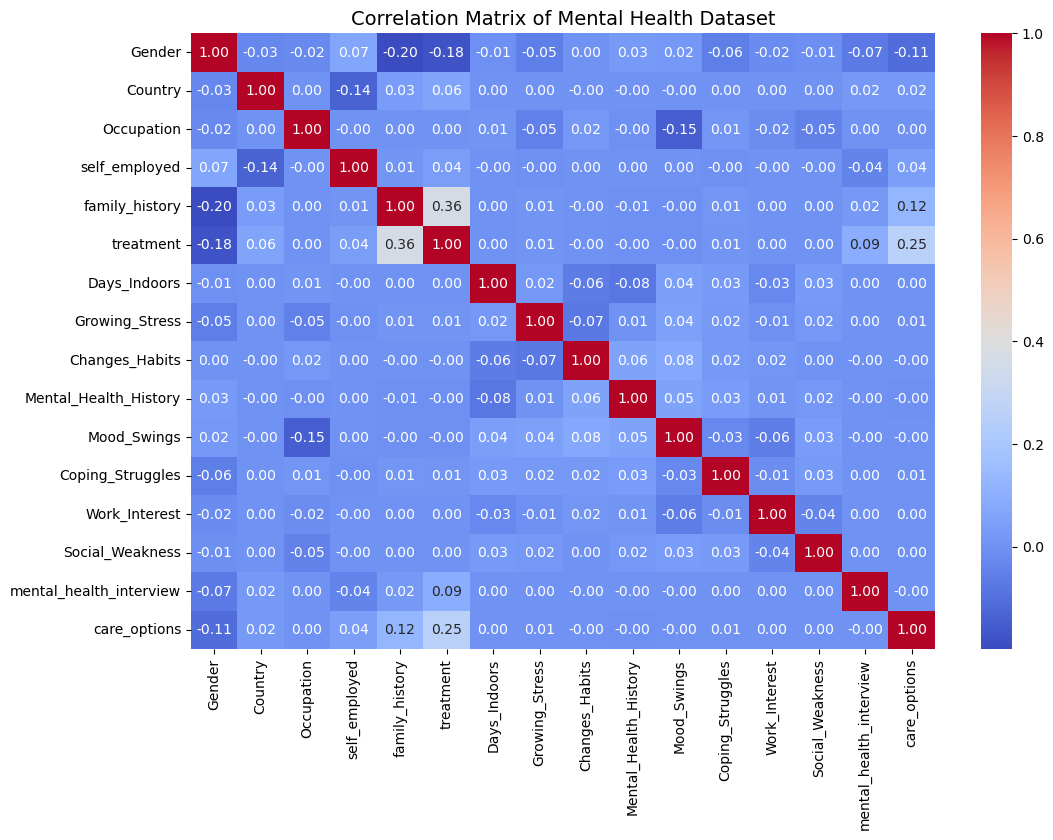

In [34]:
import seaborn as sns

# Generate the correlation matrix
corr_matrix = cleaned_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Mental Health Dataset', fontsize=14)
plt.savefig('../notebooks/images/correlation_matrix.png')  # Save the plot
plt.show()


# Key Observations:
family_history shows a moderate positive correlation with treatment (0.36), indicating that individuals with a family history of mental health issues are more likely to seek treatment.
care_options has a moderate positive correlation with treatment (0.25), suggesting that having mental health care options available is associated with a higher likelihood of seeking treatment.
Most other variables exhibit weak correlations, suggesting minimal linear relationships between them.

# Crosstab Analysis
Crosstab analysis is useful for exploring relationships between categorical variables. This technique will help us understand how different categories interact with each other. We'll focus on relationships such as:

Gender vs. Treatment: Analyzing how treatment rates differ by gender.
Family History vs. Treatment: Investigating whether a family history of mental illness influences the likelihood of receiving treatment.
Occupation vs. Mental Health Indicators: Understanding how occupation impacts mental health conditions.

In [36]:
# Gender vs. Treatment crosstab
gender_treatment_ct = pd.crosstab(cleaned_df['Gender'], cleaned_df['treatment'])
print("Crosstab of Gender vs. Treatment:")
print(gender_treatment_ct)


Crosstab of Gender vs. Treatment:
treatment       0       1
Gender                   
0           15947   36204
1          127920  109980


Observations: The majority of the respondents in the dataset are male, with a significant portion not receiving treatment compared to females. However, the proportion of females receiving treatment is much higher relative to their total count.
Insight: This suggests that females might be more likely to seek treatment for mental health issues compared to males in this dataset.


In [38]:
# Family History vs. Treatment crosstab
family_history_treatment_ct = pd.crosstab(cleaned_df['family_history'], cleaned_df['treatment'])
print("\nCrosstab of Family History vs. Treatment:")
print(family_history_treatment_ct)



Crosstab of Family History vs. Treatment:
treatment            0      1
family_history               
0               112914  62604
1                30953  83580


Observations: Individuals with a family history of mental health issues (1) are much more likely to receive treatment compared to those without a family history (0).
Insight: Family history appears to be a strong influencing factor in seeking mental health treatment, indicating a possible awareness or predisposition to address mental health issues.

In [40]:
# Occupation vs. Mental Health History crosstab
occupation_mental_health_ct = pd.crosstab(cleaned_df['Occupation'],cleaned_df['Mental_Health_History'])
print("\nCrosstab of Occupation vs. Mental Health History:")
print(occupation_mental_health_ct)


Crosstab of Occupation vs. Mental Health History:
Mental_Health_History      0      1      2
Occupation                                
0                      13148  20589  16082
1                      23029  19132  18522
2                      23392  22172  20342
3                      14489  18517  19369
4                      20458  22903  17907


. Occupation C has the highest counts in all three categories, indicating a more balanced but significant presence of individuals with a history of mental health issues.
. Occupation E has a considerable number of individuals reporting both a clear history (1) and an unclear history (2) of mental health issues, although fewer individuals have no history of mental health concerns.
. Occupation D shows a slightly lower number of individuals with a history of mental health issues compared to Occupations A, B, and C

Insight: The differences in mental health history prevalence across occupations suggest that the type of work or industry might significantly influence mental health conditions. Occupations with high levels of mental health history may be linked to stressful work environments or other job-related factors that impact mental well-being.

General Insights from Crosstab Analysis
The updated crosstab analysis still highlights that there are significant differences across occupations in terms of mental health history. This observation emphasizes the need to understand how work-related factors, like job stress or organizational support, might contribute to mental health conditions in different occupations.